In [43]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from ipywidgets import interact
import ipywidgets as widgets
from scipy.stats import gaussian_kde

import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

tf.config.experimental.set_memory_growth(tf.config.experimental.list_physical_devices('GPU')[0], enable=True)

In [70]:
with open('result.pickle', 'rb') as fp:
    logs = pickle.load(fp)
    
print(f'Number of steps: {len(logs)}')

Number of steps: 900


In [77]:
np.random.seed(1)
data_train = np.concatenate([np.random.normal(loc=-0.5, scale=0.5, size=300), np.random.normal(loc=1, scale=0.05, size=300)])
density = gaussian_kde(data_train)
domain = np.linspace(-6, 6, 200)

prior_densities = tfd.Normal(loc=0., scale=1.).prob(domain).numpy()

@interact
def plots(step=widgets.IntSlider(min=0, max=len(logs) - 1, step=1, value=0),
          ylim=widgets.FloatText(value=1.)):
    plt.rcParams.update({'font.size': 16})
    fig, axes = plt.subplots(3, 2, figsize=(20, 10))
    for i in range(2):
        axes[0, i].set_ylim(0, ylim)
            
    axes[0, 0].plot(domain, logs[step]['before_qz'], label='before update')
    axes[0, 0].plot(domain, logs[step]['after_qz'], label='after update')
    axes[0, 0].plot(domain, prior_densities, label='true $p(z)$')
    axes[0, 0].set_xlabel('$z$')
    axes[0, 0].set_ylabel('$q(z)$')
    axes[0, 0].legend()
    
    axes[0, 1].plot(domain, logs[step]['before_px'], label='before update')
    axes[0, 1].plot(domain, logs[step]['after_px'], label='after update')
    axes[0, 1].plot(domain, density(domain), label='true $p(x)$')
    axes[0, 1].set_xlabel('$x$')
    axes[0, 1].set_ylabel('$p(x)$')
    axes[0, 1].legend()
    
    axes[1, 0].plot(domain, logs[step]['before_px_mean'], label='before update')
    axes[1, 0].plot(domain, logs[step]['after_px_mean'], label='after update')
    axes[1, 0].set_xlabel('$z$')
    axes[1, 0].set_ylabel('$\mu_{p(x|z)}$')
    axes[1, 0].legend()
    
    axes[2, 0].plot(domain, logs[step]['before_px_std'], label='before update')
    axes[2, 0].plot(domain, logs[step]['after_px_std'], label='after update')
    axes[2, 0].set_xlabel('$z$')
    axes[2, 0].set_ylabel('$\sigma_{p(x|z)}$')
    axes[2, 0].legend()
    
    axes[1, 1].scatter(data_train, logs[step]['before_qz_mean'], label='before update')
    axes[1, 1].scatter(data_train, logs[step]['after_qz_mean'], label='after update')
    axes[1, 1].set_xlabel('$x$')
    axes[1, 1].set_ylabel('$\mu_{q(z|x)}$')
    axes[1, 1].set_xlim(-6, 6)
    axes[1, 1].legend()
    
    axes[2, 1].scatter(data_train, logs[step]['before_qz_std'], label='before update')
    axes[2, 1].scatter(data_train, logs[step]['after_qz_std'], label='after update')
    axes[2, 1].set_xlabel('$x$')
    axes[2, 1].set_ylabel('$\sigma_{q(z|x)}$')
    axes[2, 1].set_xlim(-6, 6)
    axes[2, 1].legend()
    
    plt.tight_layout()

interactive(children=(IntSlider(value=0, description='step', max=899), FloatText(value=1.0, description='ylim'…

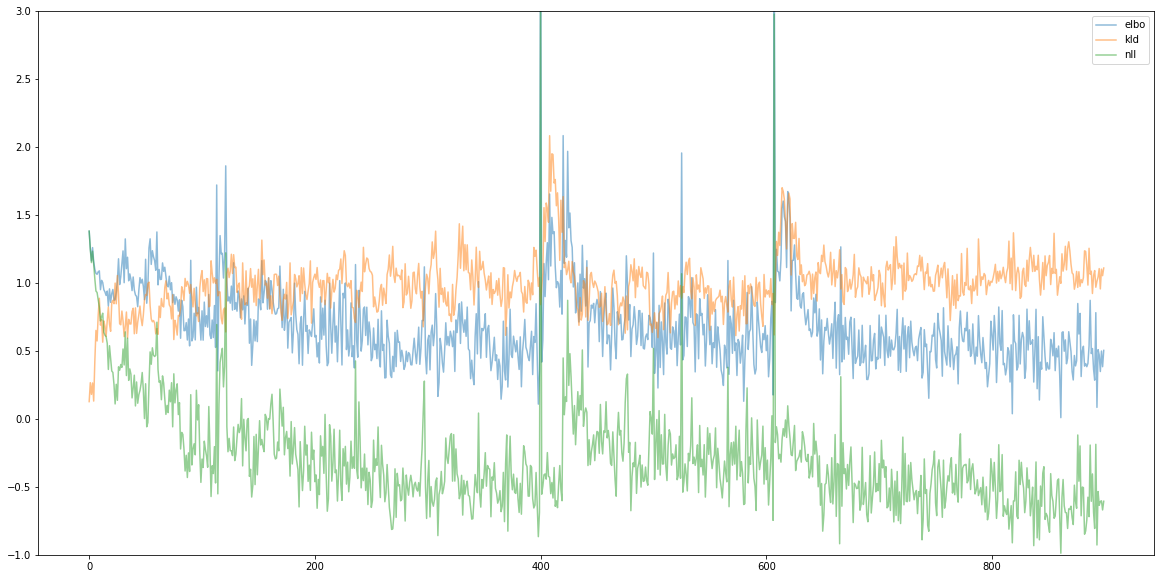

In [72]:
elbo, kld, nll = zip(*[(l['elbo'], l['kld'], l['nll']) for l in logs])

plt.figure(figsize=(20, 10))
plt.plot(elbo, alpha=0.5, label='elbo')
plt.plot(kld, alpha=0.5, label='kld')
plt.plot(nll, alpha=0.5, label='nll')
plt.ylim(-1, 3)
plt.legend()